In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [346]:
#os.listdir()
os.chdir("preprocessed_data")

FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'preprocessed_data'

In [347]:
df = pd.read_csv(r'DataSUS_For_ML.csv', sep=';', encoding='UTF-8', usecols=None)
df.shape

(784435, 44)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784435 entries, 0 to 784434
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Notification_Date        784435 non-null  object 
 1   First_Symptom_Date       784435 non-null  object 
 2   State                    784435 non-null  object 
 3   Gender                   784435 non-null  object 
 4   Pregnancy                784435 non-null  object 
 5   Race                     784435 non-null  object 
 6   Schooling                784435 non-null  object 
 7   Fever                    784435 non-null  object 
 8   Cough                    784435 non-null  object 
 9   Sore_Throat              784435 non-null  object 
 10  Dyspnea                  784435 non-null  object 
 11  Respiratory_Discomfort   784435 non-null  object 
 12  Saturation               784435 non-null  object 
 13  Diarrhea                 784435 non-null  object 
 14  Vomi

# Dropping Dates

In [349]:
df.drop('Notification_Date', axis=1, inplace=True)
df.drop('First_Symptom_Date', axis=1, inplace=True)
df.drop('Admission_Date', axis=1, inplace=True)
df.drop('Intubation_Date', axis=1, inplace=True)
df.drop('PCR_Date', axis=1, inplace=True)
df.drop('Evolution_Date', axis=1, inplace=True)
df.drop('Hospital_Discharge_Date', axis=1, inplace=True)
df.drop('Sample_Date', axis=1, inplace=True)

# Dropping from Analytics conclusions

In [350]:
df.drop('State', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('Race', axis=1, inplace=True)
df.drop('Schooling', axis=1, inplace=True)
df.drop('Postpartum', axis=1, inplace=True)
df.drop('Pregnancy', axis=1, inplace=True)
df.drop('Vaccine', axis=1, inplace=True)
df.drop('Outbreak_Count', axis=1, inplace=True)

# Not for the topic

In [351]:
df.drop('Evolution', axis=1, inplace=True)
df.drop('ICU', axis=1, inplace=True)
df.drop('Ventilatory_Support', axis=1, inplace=True)

# Labeling and Scoreing Categories

In [352]:
from sklearn import preprocessing

In [353]:
def correction(v):
    if v == '1':
        return 1
    elif v == '0':
        return 0
    else:
        return 0

In [354]:
def result(v):
    if v == 'Detectable':
        return 1
    elif v == 'Not Detectable':
        return 0

In [355]:
selected_columns = ['Fever', 'Cough', 'Sore_Throat', 'Dyspnea', 'Respiratory_Discomfort', 'Saturation', 'Diarrhea', 
                    'Vomiting', 'Other_Symptoms', 'Risk_Factors', 'Heart_Disease', 'Hematology', 'Down_Syndrome',
                    'Liver_Disease', 'Asthma', 'Diabetes', 'Neuropathies', 'Lung_Disease', 'Immunosuppression',
                    'Kidney_Disease', 'Obesity']

In [356]:
for v in selected_columns:
    df[v] = list(map(correction, df[v]))

In [357]:
df['PCR_Result'] = list(map(result, df['PCR_Result']))

In [358]:
(df.isnull().sum()/df.shape[0])*100

Fever                     0.0
Cough                     0.0
Sore_Throat               0.0
Dyspnea                   0.0
Respiratory_Discomfort    0.0
Saturation                0.0
Diarrhea                  0.0
Vomiting                  0.0
Other_Symptoms            0.0
Risk_Factors              0.0
Heart_Disease             0.0
Hematology                0.0
Down_Syndrome             0.0
Liver_Disease             0.0
Asthma                    0.0
Diabetes                  0.0
Neuropathies              0.0
Lung_Disease              0.0
Immunosuppression         0.0
Kidney_Disease            0.0
Obesity                   0.0
PCR_Result                0.0
Age                       0.0
Outbreak_Period           0.0
TimeDelta_PCR             0.0
dtype: float64

# Correlations with PCR result 

In [359]:
df.corr()['PCR_Result'].sort_values(ascending=False)*100

PCR_Result                100.000000
Age                        13.661550
Fever                      11.811309
Cough                       8.147950
Diabetes                    7.317519
Obesity                     6.994835
Outbreak_Period             6.813043
Other_Symptoms              5.641098
Saturation                  4.793154
Diarrhea                    4.548729
Heart_Disease               4.524081
Sore_Throat                 3.655888
TimeDelta_PCR               2.348696
Dyspnea                     2.300203
Down_Syndrome              -1.309859
Kidney_Disease             -1.544257
Respiratory_Discomfort     -1.839453
Liver_Disease              -2.114155
Hematology                 -2.292376
Vomiting                   -4.692872
Immunosuppression          -5.128197
Neuropathies               -6.400240
Asthma                     -7.506224
Lung_Disease               -8.092423
Risk_Factors                     NaN
Name: PCR_Result, dtype: float64

In [360]:
#df.drop('Age', axis=1, inplace=True)
df.drop('Asthma', axis=1, inplace=True)
#df.drop('Cough', axis=1, inplace=True)
#df.drop('Diabetes', axis=1, inplace=True)
df.drop('Diarrhea', axis=1, inplace=True)
df.drop('Down_Syndrome', axis=1, inplace=True)
#df.drop('Dyspnea', axis=1, inplace=True)
#df.drop('Fever', axis=1, inplace=True)
#df.drop('Heart_Disease', axis=1, inplace=True)
df.drop('Hematology', axis=1, inplace=True)
df.drop('Immunosuppression', axis=1, inplace=True)
df.drop('Kidney_Disease', axis=1, inplace=True)
#df.drop('Liver_Disease', axis=1, inplace=True)
#df.drop('Lung_Disease', axis=1, inplace=True)
df.drop('Neuropathies', axis=1, inplace=True)
#df.drop('Obesity', axis=1, inplace=True)
df.drop('Other_Symptoms', axis=1, inplace=True)
df.drop('Outbreak_Period', axis=1, inplace=True)
#df.drop('Respiratory_Discomfort', axis=1, inplace=True)
df.drop('Risk_Factors', axis=1, inplace=True)
#df.drop('Saturation', axis=1, inplace=True)
df.drop('Sore_Throat', axis=1, inplace=True)
df.drop('TimeDelta_PCR', axis=1, inplace=True)
df.drop('Vomiting', axis=1, inplace=True)

# Inbalance Data Check

In [361]:
df['PCR_Result'].value_counts()

1    474493
0    309942
Name: PCR_Result, dtype: int64

In [362]:
(474493-309942)/(474493+309942)

0.209770089299942

In [363]:
#from imblearn.over_sampling import SMOTE

y = df['PCR_Result']
X = df.drop('PCR_Result', axis=1)

X_sm = X
y_sm = y

#smote = SMOTE(sampling_strategy='minority') # not majority
#X_sm, y_sm = smote.fit_resample(X,y)
#y_sm.value_counts()

# Split DataFrame in Test and Train

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

# Logistic Regression

In [365]:
from sklearn.linear_model import LogisticRegression

In [189]:
%%capture
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

In [190]:
# obtain predicted probabilities for each class
y_prob = logistic.predict_proba(X_test)

# set a new threshold for the probability of the positive class
new_threshold = 0.5

# classify instances based on the new threshold
y_pred = (y_prob[:, 1] >= new_threshold).astype(int)

logistic.score(X_train, y_train)

print(logistic.intercept_)
print(logistic.coef_)

feature_name = X.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(logistic.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', logistic.intercept_[0]]

summary_table.sort_values(by='Coefficient', ascending=True)*100
#summary_table = summary_table.sort_index()
summary_table

[-1.26362605]
[[ 0.51609956  0.2969256  -0.00447671 -0.19840918  0.13912464 -0.05992909
  -0.05984293  0.20991515 -0.81248353  0.86249097  0.01401179]]


,Feature name,Coefficient
1,Fever,0.516100
2,Cough,0.296926
3,Dyspnea,-0.004477
4,Respiratory_Discomfort,-0.198409
5,Saturation,0.139125
6,Heart_Disease,-0.059929
7,Liver_Disease,-0.059843
8,Diabetes,0.209915
9,Lung_Disease,-0.812484
10,Obesity,0.862491


In [191]:
import math

def calculate_odds_ratio(coff):
    return math.exp(coff)

summary_table['Odd Ratio'] = summary_table['Coefficient'].apply(calculate_odds_ratio)
summary_table

,Feature name,Coefficient,Odd Ratio
1,Fever,0.516100,1.675480
2,Cough,0.296926,1.345715
3,Dyspnea,-0.004477,0.995533
4,Respiratory_Discomfort,-0.198409,0.820034
5,Saturation,0.139125,1.149267
6,Heart_Disease,-0.059929,0.941831
7,Liver_Disease,-0.059843,0.941912
8,Diabetes,0.209915,1.233573
9,Lung_Disease,-0.812484,0.443755
10,Obesity,0.862491,2.369055


In [192]:
from sklearn.metrics import accuracy_score

In [193]:
from sklearn.metrics import confusion_matrix

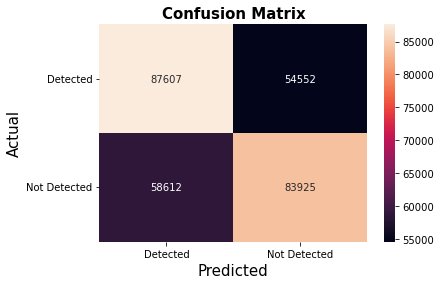

In [194]:
cm = confusion_matrix(y_test, y_pred, labels = [1,0])
labels = ["Detected", "Not Detected"]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
#sns.heatmap(cm, annot=True,  xticklabels = ["Detected", "Not Detected"], yticklabels = ["Detected", "Not Detected"])


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

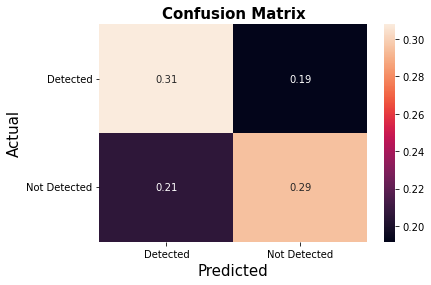

In [201]:
cm = confusion_matrix(y_test, y_pred, labels = [1,0], normalize='all')
labels = ["Detected", "Not Detected"]
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
#sns.heatmap(cm, annot=True,  xticklabels = ["Detected", "Not Detected"], yticklabels = ["Detected", "Not Detected"])


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [202]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [203]:
accuracy_score(y_test, y_pred)

0.6025093432995194

In [204]:
 precision_score(y_test, y_pred, labels = [1,0])

0.5991492213734193

In [205]:
recall_score(y_test, y_pred, labels = [1,0])

0.6162606658741269

In [206]:
f1_score(y_test, y_pred, average='macro')

0.6024428459384605

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60    142537
           1       0.60      0.62      0.61    142159

    accuracy                           0.60    284696
   macro avg       0.60      0.60      0.60    284696
weighted avg       0.60      0.60      0.60    284696



In [208]:
predict_proba = logistic.predict_proba(X_test)

lista = []
for i, pred in enumerate(predict_proba):
    lista.append(predict_proba[i][1])

In [209]:
df_ = pd.DataFrame()

df_['Age'] = X_test['Age']
df_['Result Predicted'] = y_pred
df_['Result'] = y_test
df_['predict_proba'] = lista
df_

,Age,Result Predicted,Result,predict_proba
695480,19.0,1,1,0.626174
936395,92.0,1,0,0.597992
396281,56.0,1,1,0.533861
190061,54.0,0,1,0.486341
577604,71.0,0,1,0.493810
...,...,...,...,...
519474,62.0,1,1,0.585139
121689,41.0,1,1,0.529816
173523,40.0,1,0,0.512644
360919,57.0,0,0,0.428679


In [210]:
df_['predict_proba'].describe()

count    284696.000000
mean          0.500538
std           0.122195
min           0.087950
25%           0.414540
50%           0.504521
75%           0.589481
max           0.881164
Name: predict_proba, dtype: float64

# Decision Tree

In [227]:
from sklearn import preprocessing

In [228]:
#from imblearn.over_sampling import SMOTE

y = df['PCR_Result']
X = df.drop('PCR_Result', axis=1)

X_sm = X
y_sm = y

#smote = SMOTE(sampling_strategy='minority') # not majority
#X_sm, y_sm = smote.fit_resample(X,y)
#y_sm.value_counts()

In [229]:
X_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784435 entries, 0 to 784434
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fever                   784435 non-null  int64  
 1   Cough                   784435 non-null  int64  
 2   Dyspnea                 784435 non-null  int64  
 3   Respiratory_Discomfort  784435 non-null  int64  
 4   Saturation              784435 non-null  int64  
 5   Heart_Disease           784435 non-null  int64  
 6   Liver_Disease           784435 non-null  int64  
 7   Diabetes                784435 non-null  int64  
 8   Lung_Disease            784435 non-null  int64  
 9   Obesity                 784435 non-null  int64  
 10  Age                     784435 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 65.8 MB


In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

In [330]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion = 'gini', random_state=None, splitter = 'best',
                             min_samples_split = 2, max_features=None, min_samples_leaf = 5000,
                             max_depth = 4, max_leaf_nodes = None, ccp_alpha=0.001)

In [331]:
clf = clf.fit(X_train, y_train)

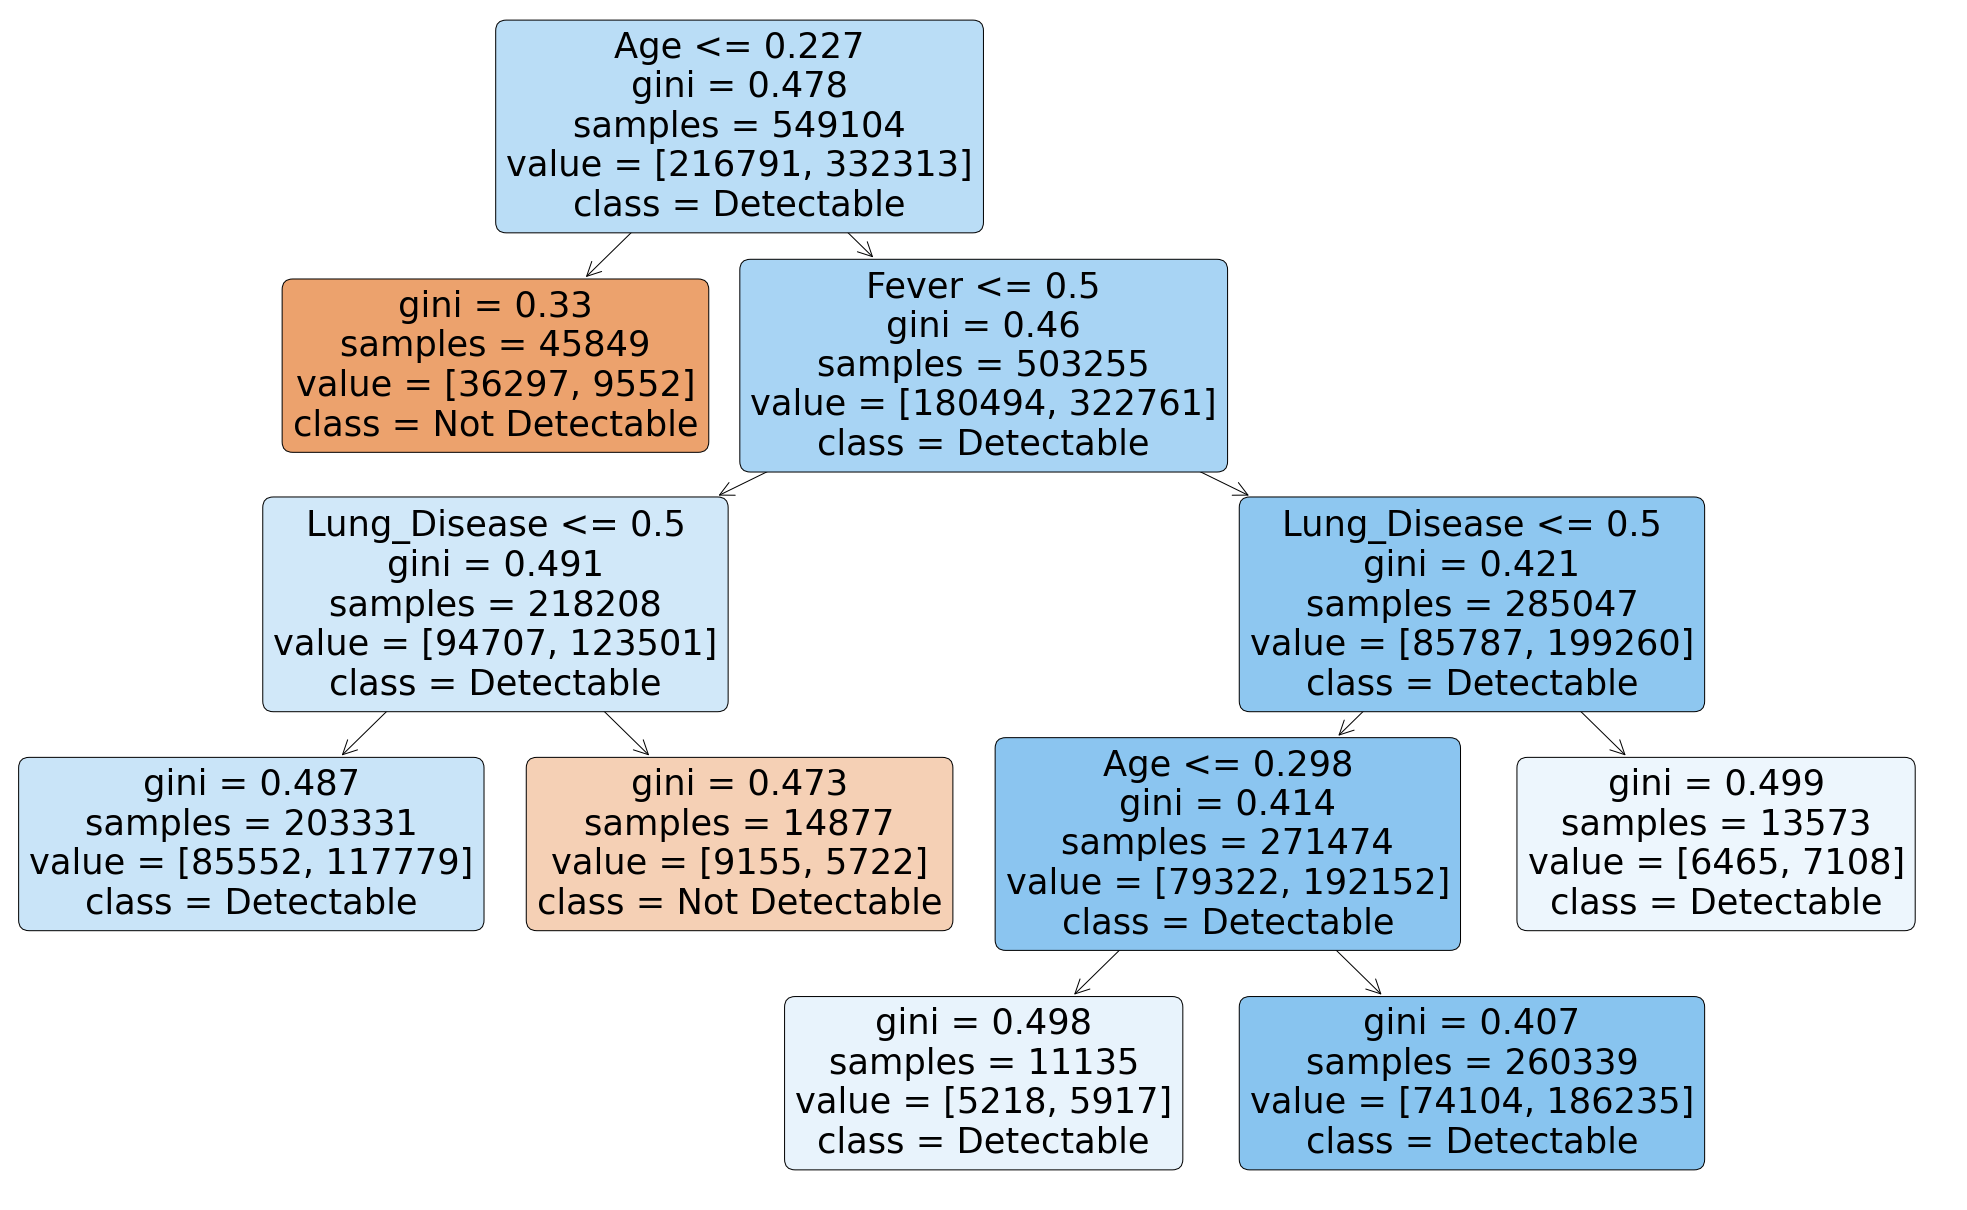

In [332]:
plt.figure(figsize=[35,22])
tree = tree.plot_tree(clf, filled = True, rounded = True, class_names = ["Not Detectable", "Detectable"], 
                      feature_names = X.columns)

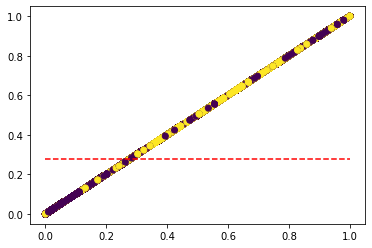

In [329]:
fig, ax = plt.subplots()

ax.scatter(X_train['Age'], X_train['Age'], c=y_train)
ax.plot([0,1],[0.28, 0.28], '--r')

plt.show()

In [320]:
importances = clf.feature_importances_
feature_names = X.columns
important_features = [(feature_names[i], importances[i]) for i in range(len(importances)) if importances[i] > 0]

print("Important features:")
for feature, importance in important_features:
    print(f"{feature}: {importance:.2%}")

Important features:
Fever: 19.21%
Lung_Disease: 8.46%
Age: 72.33%


In [321]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6598833132906416


In [322]:
y_pred = clf.predict(X_test)

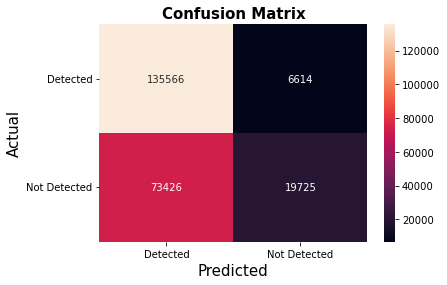

In [323]:
cm = confusion_matrix(y_test, y_pred, labels = [1,0])
labels = ["Detected", "Not Detected"]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
#sns.heatmap(cm, annot=True,  xticklabels = ["Detected", "Not Detected"], yticklabels = ["Detected", "Not Detected"])


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [262]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, labels = [1,0]))
print(recall_score(y_t est, y_pred, labels = [1,0]))
print(f1_score(y_test, y_pred, average='macro'))

0.6648635326412585
0.6620525841592269
0.9096075397383598
0.5869779098922319


In [238]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.21      0.33     93031
           1       0.65      0.95      0.77    142300

    accuracy                           0.66    235331
   macro avg       0.70      0.58      0.55    235331
weighted avg       0.69      0.66      0.60    235331



# Random Forest

In [410]:
from sklearn.ensemble import RandomForestClassifier

In [411]:
%%capture
        
    
cm = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state=None, max_depth = 10,
                                max_leaf_nodes = None, ccp_alpha=0.001) # padrão = 100 arvores
cm.fit(X_train, y_train)

In [412]:
y_pred = cm.predict(X_test)

In [413]:
accuracy_score(y_test, y_pred)

0.6587954838079131

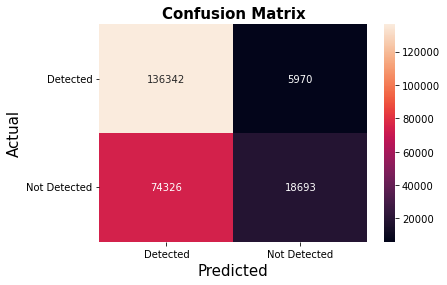

In [414]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#:~:text=sklearn.metrics.confusion_matrix%28y_true%2C%20y_pred%2C%20%2A%2C%20labels%3DNone%2C%20sample_weight%3DNone%2C%20normalize%3DNone%29%20%5Bsource%5D%20%C2%B6,i%20and%20predicted%20to%20be%20in%20group%20j.
# sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
cm = confusion_matrix(y_test, y_pred, labels = [1,0])
labels = ["Detected", "Not Detected"]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
#sns.heatmap(cm, annot=True,  xticklabels = ["Detected", "Not Detected"], yticklabels = ["Detected", "Not Detected"])


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [415]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, labels = [1,0]))
print(recall_score(y_test, y_pred, labels = [1,0]))
print(f1_score(y_test, y_pred, average='macro'))

0.6587954838079131
0.6471889418421403
0.9580499184889538
0.5451031682833215


In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.20      0.32     93031
           1       0.65      0.96      0.77    142300

    accuracy                           0.66    235331
   macro avg       0.70      0.58      0.55    235331
weighted avg       0.69      0.66      0.59    235331



# RNA

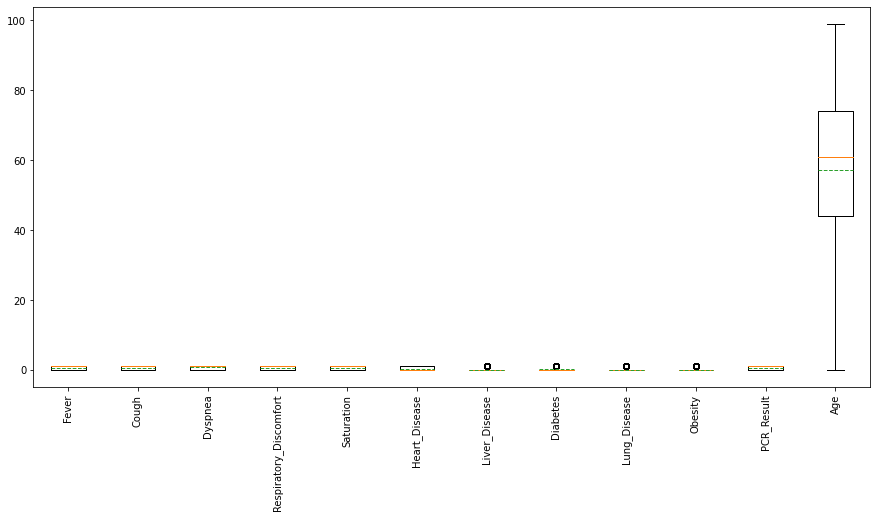

In [366]:
plt.figure(figsize=(15, 7))
plt.boxplot(df, showmeans= True, labels=df.columns.values, meanline=True, vert = True)
plt.xticks(rotation=90)
plt.show()

In [367]:
df_standardized = df.copy() # Creating a DF to be trasformed

In [368]:
lista_atributos = df.columns.values

for atributo in lista_atributos:
    lista_val = []
    maximo = np.max(abs(df_standardized[atributo]))
    for valor in df_standardized[atributo]:
        if maximo == 0:
            lista_val.append(0)
        else:
            lista_val.append(valor / maximo)
    
    df_standardized[atributo] = lista_val
    pd.DataFrame(df_standardized)  

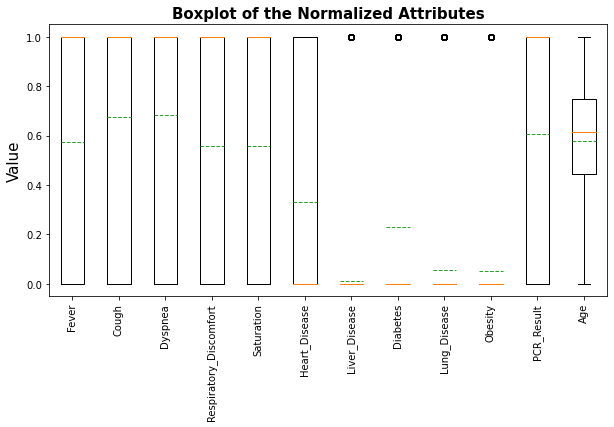

In [370]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_standardized, showmeans= True, labels=df.columns.values, meanline=True, vert = True)

plt.title('Boxplot of the Normalized Attributes', fontsize = 15, fontweight = 'bold')
#plt.xlabel('Attributes', fontsize = 15)
plt.ylabel('Value', fontsize = 15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

In [371]:
df_standardized['PCR_Result'].value_counts()

1.0    474493
0.0    309942
Name: PCR_Result, dtype: int64

In [372]:
y_sm = df_standardized['PCR_Result']
X_sm = df_standardized.drop('PCR_Result', axis=1)

In [373]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

In [398]:
import tensorflow as tf

In [402]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 11, activation='sigmoid', input_shape=(11,)))
rede_neural.add(tf.keras.layers.Dense(units = 9, activation = 'sigmoid'))
rede_neural.add(tf.keras.layers.Dense(units = 5, activation = 'sigmoid'))
rede_neural.add(tf.keras.layers.Dense(units = 3, activation = 'sigmoid'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [403]:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [404]:
rede_neural.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 11)                132       
                                                                 
 dense_25 (Dense)            (None, 9)                 108       
                                                                 
 dense_26 (Dense)            (None, 5)                 50        
                                                                 
 dense_27 (Dense)            (None, 3)                 18        
                                                                 
 dense_28 (Dense)            (None, 1)                 4         
                                                                 
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


In [405]:
rede_neural.fit(X_train, y_train, epochs=5)

Epoch 1/5
17160/17160 [==============================] - 41s 2ms/step - loss: 0.6435 - accuracy: 0.6406
Epoch 2/5
17160/17160 [==============================] - 38s 2ms/step - loss: 0.6249 - accuracy: 0.6610
Epoch 3/5
17160/17160 [==============================] - 38s 2ms/step - loss: 0.6207 - accuracy: 0.6620
Epoch 4/5
17160/17160 [==============================] - 38s 2ms/step - loss: 0.6188 - accuracy: 0.6630
Epoch 5/5
17160/17160 [==============================] - 38s 2ms/step - loss: 0.6178 - accuracy: 0.6637


In [406]:
y_pred = rede_neural.predict(X_test)
y_pred = (y_pred >= 0.5)

7355/7355 [==============================] - 10s 1ms/step


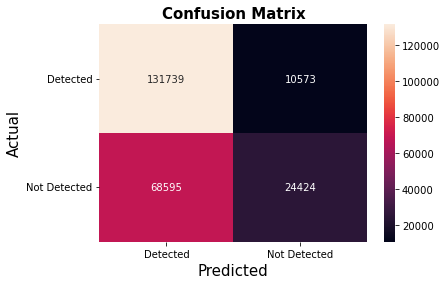

In [407]:
cm = confusion_matrix(y_test, y_pred, labels = [1,0])
labels = ["Detected", "Not Detected"]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
#sns.heatmap(cm, annot=True,  xticklabels = ["Detected", "Not Detected"], yticklabels = ["Detected", "Not Detected"])


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [408]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, labels = [1,0]))
print(recall_score(y_test, y_pred, labels = [1,0]))
print(f1_score(y_test, y_pred, average='macro'))

0.6635887324661859
0.6575968133217527
0.9257054921580752
0.57526417426139


In [409]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.26      0.38     93019
         1.0       0.66      0.93      0.77    142312

    accuracy                           0.66    235331
   macro avg       0.68      0.59      0.58    235331
weighted avg       0.67      0.66      0.62    235331

